### MILESTONE-1 

IMPORTING LIBRARIES and DATASET:

In [1]:
import numpy as np                               #Library for working with dataframe numerical data
import pandas as pd                              #Library for working with dataframe data
import datetime                                  #Library to change the format into date
import matplotlib.pyplot as plt                  #Visualisation library
import seaborn as sns                            #Visualisation library

In [2]:
# 1. Reading CSV
dataset=pd.read_csv('Final.csv')

# 2. Describe dataset
dataset.describe()

,CUSTOMER_ORDER_ID,SALES_ORG,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,SOLD_TO_PARTY,REQUESTED_DELIVERY_DATE,CREDIT_STATUS,CUSTOMER_NUMBER
count,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,1.101925e+06,219478.000000,1.101925e+06
mean,8.763187e+08,3.304891e+03,3.431364e+03,2.022032e+07,1.340316e+05,8.763265e+08,2.022035e+07,74.464771,1.074092e+09
std,7.088594e+07,6.958920e+02,5.483805e+02,1.426756e+02,6.503618e+04,7.090306e+07,1.751912e+03,14.444210,4.042693e+08
min,7.534520e+08,2.100000e+03,5.900000e+01,2.022010e+07,0.000000e+00,7.534518e+08,2.019081e+07,52.000000,1.210001e+07
25%,8.149522e+08,2.702000e+03,3.260000e+03,2.022021e+07,8.170200e+04,8.148366e+08,2.022022e+07,64.000000,1.230006e+09
50%,8.763963e+08,3.305000e+03,3.660000e+03,2.022032e+07,1.509540e+05,8.763542e+08,2.022033e+07,64.000000,1.230014e+09
75%,9.376832e+08,3.908000e+03,3.670000e+03,2.022042e+07,1.853580e+05,9.377293e+08,2.022050e+07,93.000000,1.230014e+09
max,9.990063e+08,4.510000e+03,4.260000e+03,2.022060e+07,2.359590e+05,9.990075e+08,2.202022e+07,93.000000,1.230025e+09


In [3]:
# 3. Shape of dataframe
dataset.shape

(1101925, 16)

In [4]:
# 4. dataset.info()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1101925 entries, 0 to 1101924
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CUSTOMER_ORDER_ID        1101925 non-null  int64  
 1   SALES_ORG                1101925 non-null  int64  
 2   DISTRIBUTION_CHANNEL     1101925 non-null  object 
 3   DIVISION                 1101925 non-null  object 
 4   RELEASED_CREDIT_VALUE    1101925 non-null  object 
 5   PURCHASE_ORDER_TYPE      1083233 non-null  object 
 6   COMPANY_CODE             1101925 non-null  int64  
 7   ORDER_CREATION_DATE      1101925 non-null  int64  
 8   ORDER_CREATION_TIME      1101925 non-null  int64  
 9   CREDIT_CONTROL_AREA      1101925 non-null  object 
 10  SOLD_TO_PARTY            1101925 non-null  int64  
 11  ORDER_AMOUNT             1101925 non-null  object 
 12  REQUESTED_DELIVERY_DATE  1101925 non-null  int64  
 13  ORDER_CURRENCY           1101925 non-null 

#### Data pre-processing

In [5]:
# 5. Total NULL values
print(dataset.isnull().sum())

#6. Replace the NaN values from the dataset
dataset=dataset.fillna(np.nan)

CUSTOMER_ORDER_ID               0
SALES_ORG                       0
DISTRIBUTION_CHANNEL            0
DIVISION                        0
RELEASED_CREDIT_VALUE           0
PURCHASE_ORDER_TYPE         18692
COMPANY_CODE                    0
ORDER_CREATION_DATE             0
ORDER_CREATION_TIME             0
CREDIT_CONTROL_AREA             0
SOLD_TO_PARTY                   0
ORDER_AMOUNT                    0
REQUESTED_DELIVERY_DATE         0
ORDER_CURRENCY                  0
CREDIT_STATUS              882447
CUSTOMER_NUMBER                 0
dtype: int64


In [6]:
#7-8. Changing the format of creation_date and delivery_date
dataset['ORDER_CREATION_DATE']=pd.to_datetime(dataset['ORDER_CREATION_DATE'],format='%Y%m%d').dt.strftime('%Y-%m-%d')
dataset['REQUESTED_DELIVERY_DATE']=pd.to_datetime(dataset['REQUESTED_DELIVERY_DATE'],format='%Y%m%d').dt.strftime('%Y-%m-%d')

In [7]:
#Changed into date formate and sorted for later, when I used TimeSeriesSplit to split the data into train and test
dataset['ORDER_CREATION_DATE']=pd.to_datetime(dataset['ORDER_CREATION_DATE'])
dataset['REQUESTED_DELIVERY_DATE']=pd.to_datetime(dataset['REQUESTED_DELIVERY_DATE'])
dataset = dataset.sort_values('ORDER_CREATION_DATE')

In [8]:
#9-10 Sanity check and dropping rows with Order Date > Delivery Date
print(dataset[dataset['ORDER_CREATION_DATE']>dataset['REQUESTED_DELIVERY_DATE']].shape[0])
dataset.drop(dataset[dataset['ORDER_CREATION_DATE']>dataset['REQUESTED_DELIVERY_DATE']].index,inplace=True)

27142


In [9]:
#11-12 "ORDER_AMOUNT" col having '-' and replacing it with ''
print("With -:",len(dataset[dataset['ORDER_AMOUNT'].str.contains('-',na=False)==True]))
dataset['ORDER_AMOUNT']=dataset['ORDER_AMOUNT'].replace('-',' ')

#13-14 "ORDER_AMOUNT" col having ',' and replacing it with '.'
print("With ,:",len(dataset[dataset['ORDER_AMOUNT'].str.contains(',',na=False)==True]))
dataset['ORDER_AMOUNT']=dataset['ORDER_AMOUNT'].replace(',','.')

With -: 32
With ,: 1073406


In [10]:
#15 Number of rows having same Order and Delivery date
print(len(dataset[dataset['ORDER_CREATION_DATE']==dataset['REQUESTED_DELIVERY_DATE']]))

#16 Count number of records for each currency type
#Changing the currecy type HU1 to HUF 
dataset['ORDER_CURRENCY']=dataset['ORDER_CURRENCY'].replace('HU1','HUF')
dataset['ORDER_CURRENCY'].value_counts()

100437


USD    622835
EUR    253196
AUD     64200
CAD     55065
GBP     22028
MYR     13946
PLN     11861
AED      7852
HKD      6198
CHF      5259
RON      4731
SGD      3909
CZK      2178
HUF      1377
NZD        79
BHD        32
SAR        14
QAR        12
KWD         7
SEK         4
Name: ORDER_CURRENCY, dtype: int64

In [11]:
#17 New column AMOUNT_IN_USD
exchange_rates={
    'EUR':1.07,
    'AUD':0.65,
    'CAD':0.74,
    'GBP':1.23,
    'MYR':0.22,
    'PLN':0.24,
    'HKD':0.13,
    'CHF':1.10,
    'RON':0.22,
    'SGD':0.74,
    'CZK':0.045,
    'HUF':0.0029,
    'NZD':0.61,
    'BHD':2.65,
    'SAR':0.27,
    'QAR':0.27,
    'KWD':3.25,
    'SEK':0.093,
    'AED':0.27,
    'USD':1.0
}
dataset['ORDER_AMOUNT']=dataset['ORDER_AMOUNT'].astype(float)

#Converting values and making new column
dataset['AMOUNT_IN_USD']=dataset.apply(lambda df:df['ORDER_AMOUNT']*exchange_rates[df['ORDER_CURRENCY']],axis=1)
dataset['AMOUNT_IN_USD']=dataset['AMOUNT_IN_USD'].round(5)

In [12]:
#18 '0' values in AMOUNT_IN_USD column
print(len(dataset[dataset['AMOUNT_IN_USD']==0]))

#19 New column UNIQUE_CUST_ID
dataset['CUSTOMER_NUMBER']=dataset['CUSTOMER_NUMBER'].astype(str)
dataset['COMPANY_CODE']=dataset['COMPANY_CODE'].astype(str)
dataset['UNIQUE_CUST_ID']=dataset['CUSTOMER_NUMBER']+dataset['COMPANY_CODE']

237821


### MILESTONE-2 

#### Data Visualisation

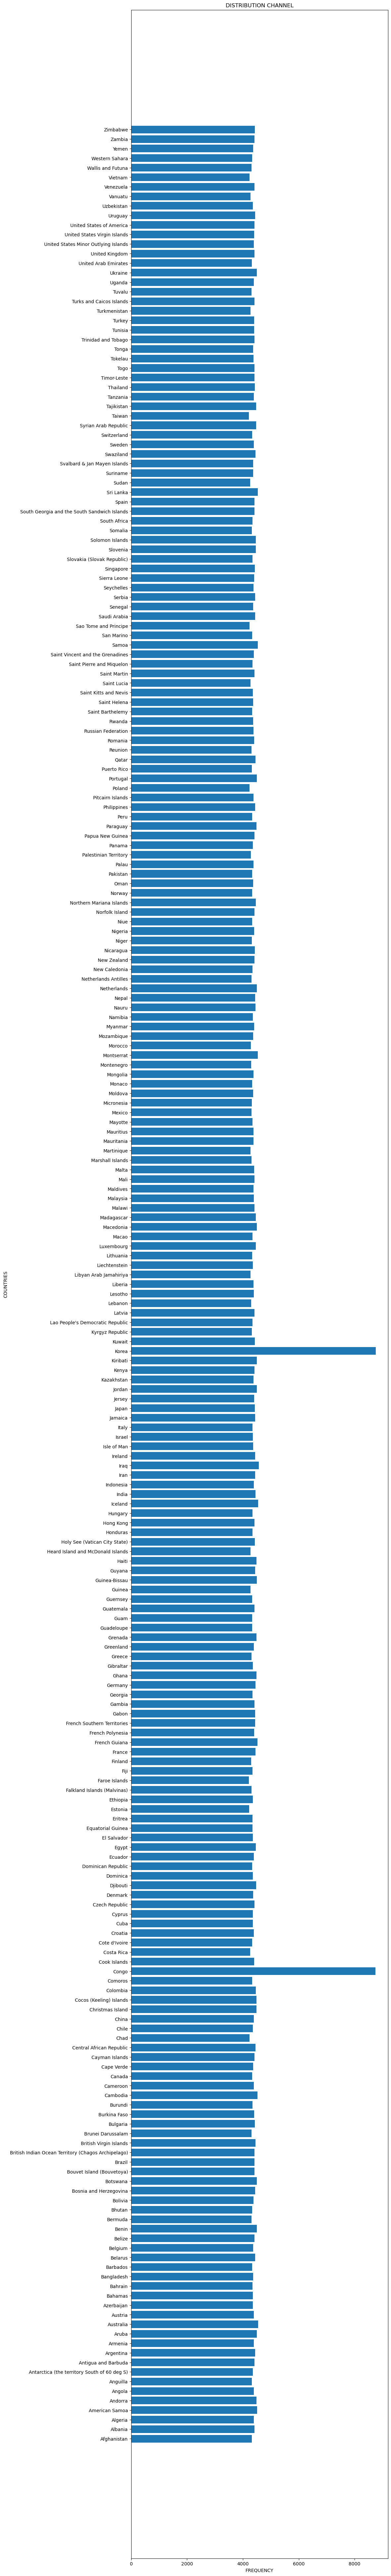

In [13]:
#1 Histogram on DISTRIBUTION_CHANNEL
plt.figure(figsize=(10,100))
labels,label_count=np.unique(dataset['DISTRIBUTION_CHANNEL'],return_counts=True)
plt.barh(labels,label_count)
plt.xlabel('FREQUENCY')
plt.ylabel('COUNTRIES')
plt.title("DISTRIBUTION CHANNEL")
plt.show()

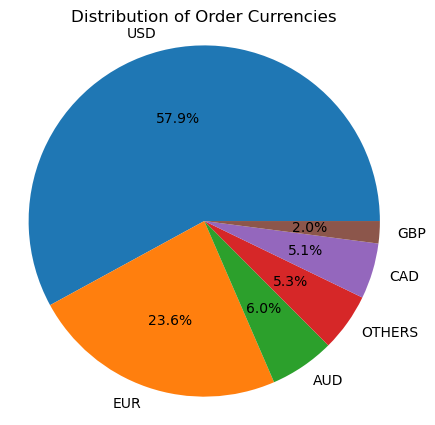

In [14]:
#2 Pie Chart on ORDER_CURRENCY

currency_counts = dataset['ORDER_CURRENCY'].value_counts()
#Taking 5 largest values and rest in others group
top_currencies = currency_counts.nlargest(5).index
dataset['ORDER_CURRENCY_MODIFIED'] = dataset['ORDER_CURRENCY'].apply(lambda x: x if x in top_currencies else 'OTHERS')
category_counts = dataset['ORDER_CURRENCY_MODIFIED'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Order Currencies')
plt.axis('equal')  
plt.show()

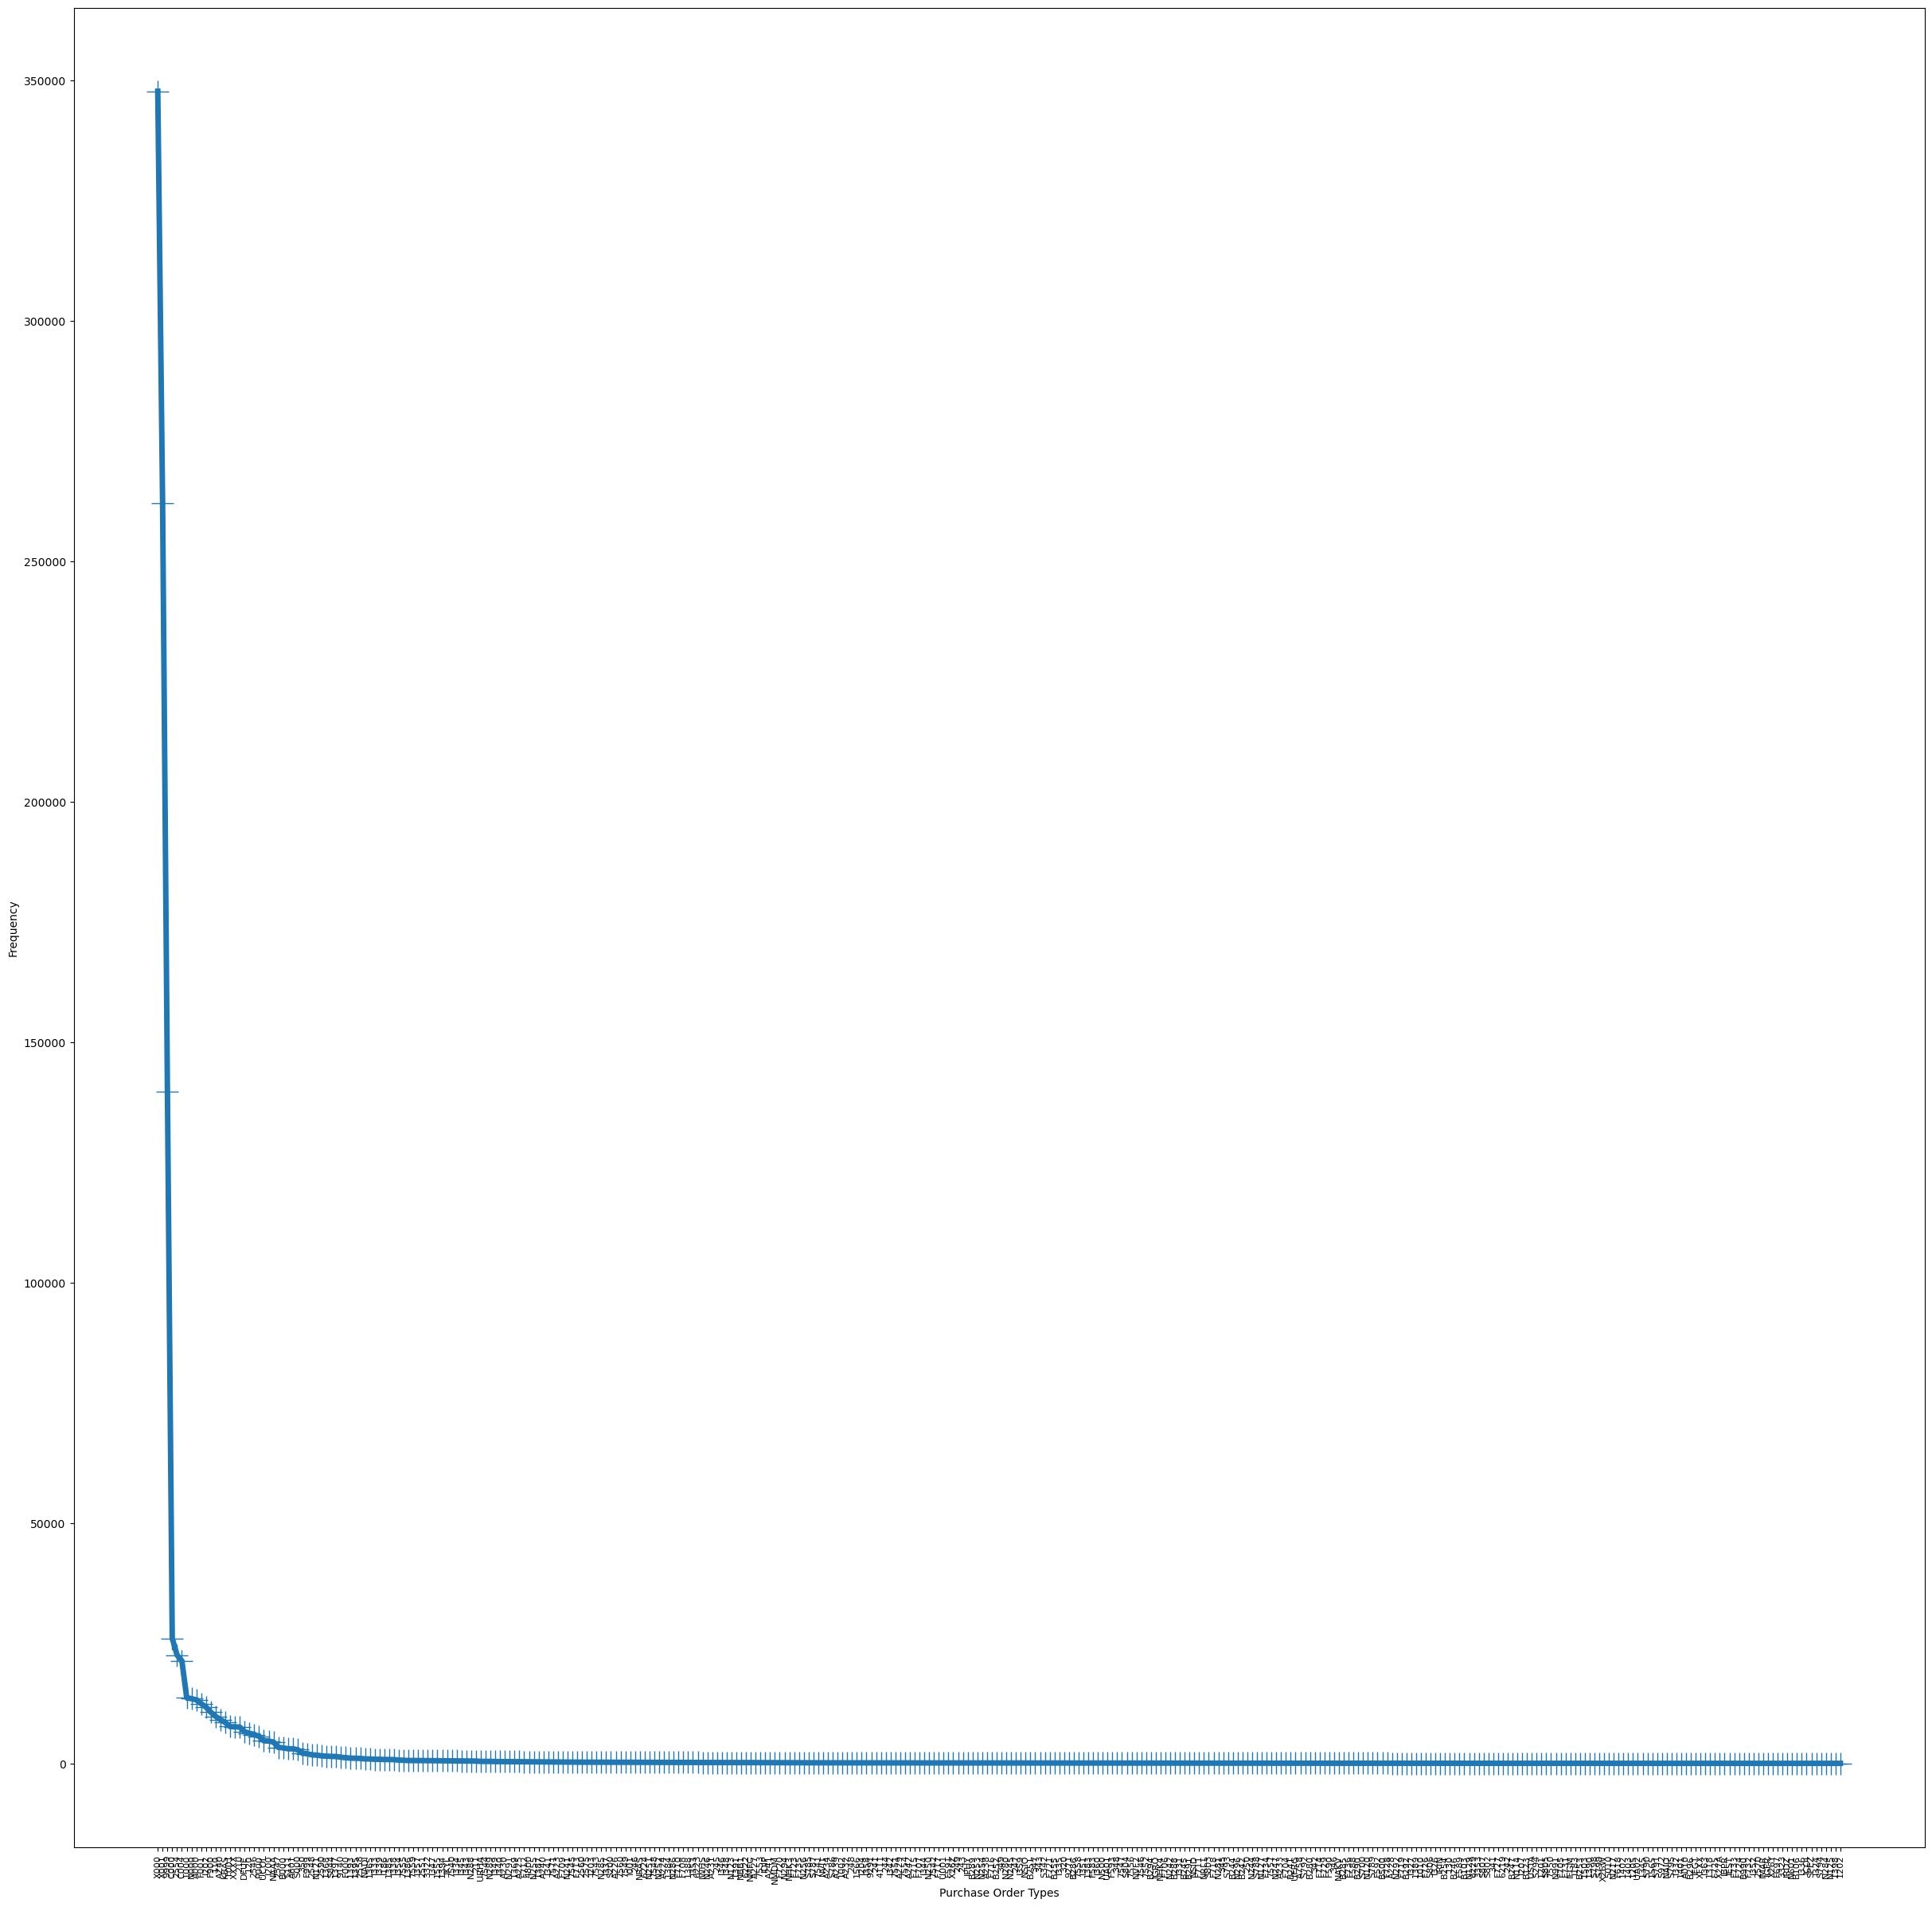

In [15]:
#3 Line chart PURCHASE_ORDER_TYPE and DISTRIBUTION_CHANNEL

plt.figure(figsize=(30, 30))
plt.xticks(fontsize=8, rotation=90)
purchase_type=dataset['PURCHASE_ORDER_TYPE'].value_counts()
plt.plot(purchase_type,'-+',linewidth=5,markersize=20)
plt.ylabel("Frequency")
plt.xlabel("Purchase Order Types")
plt.show()

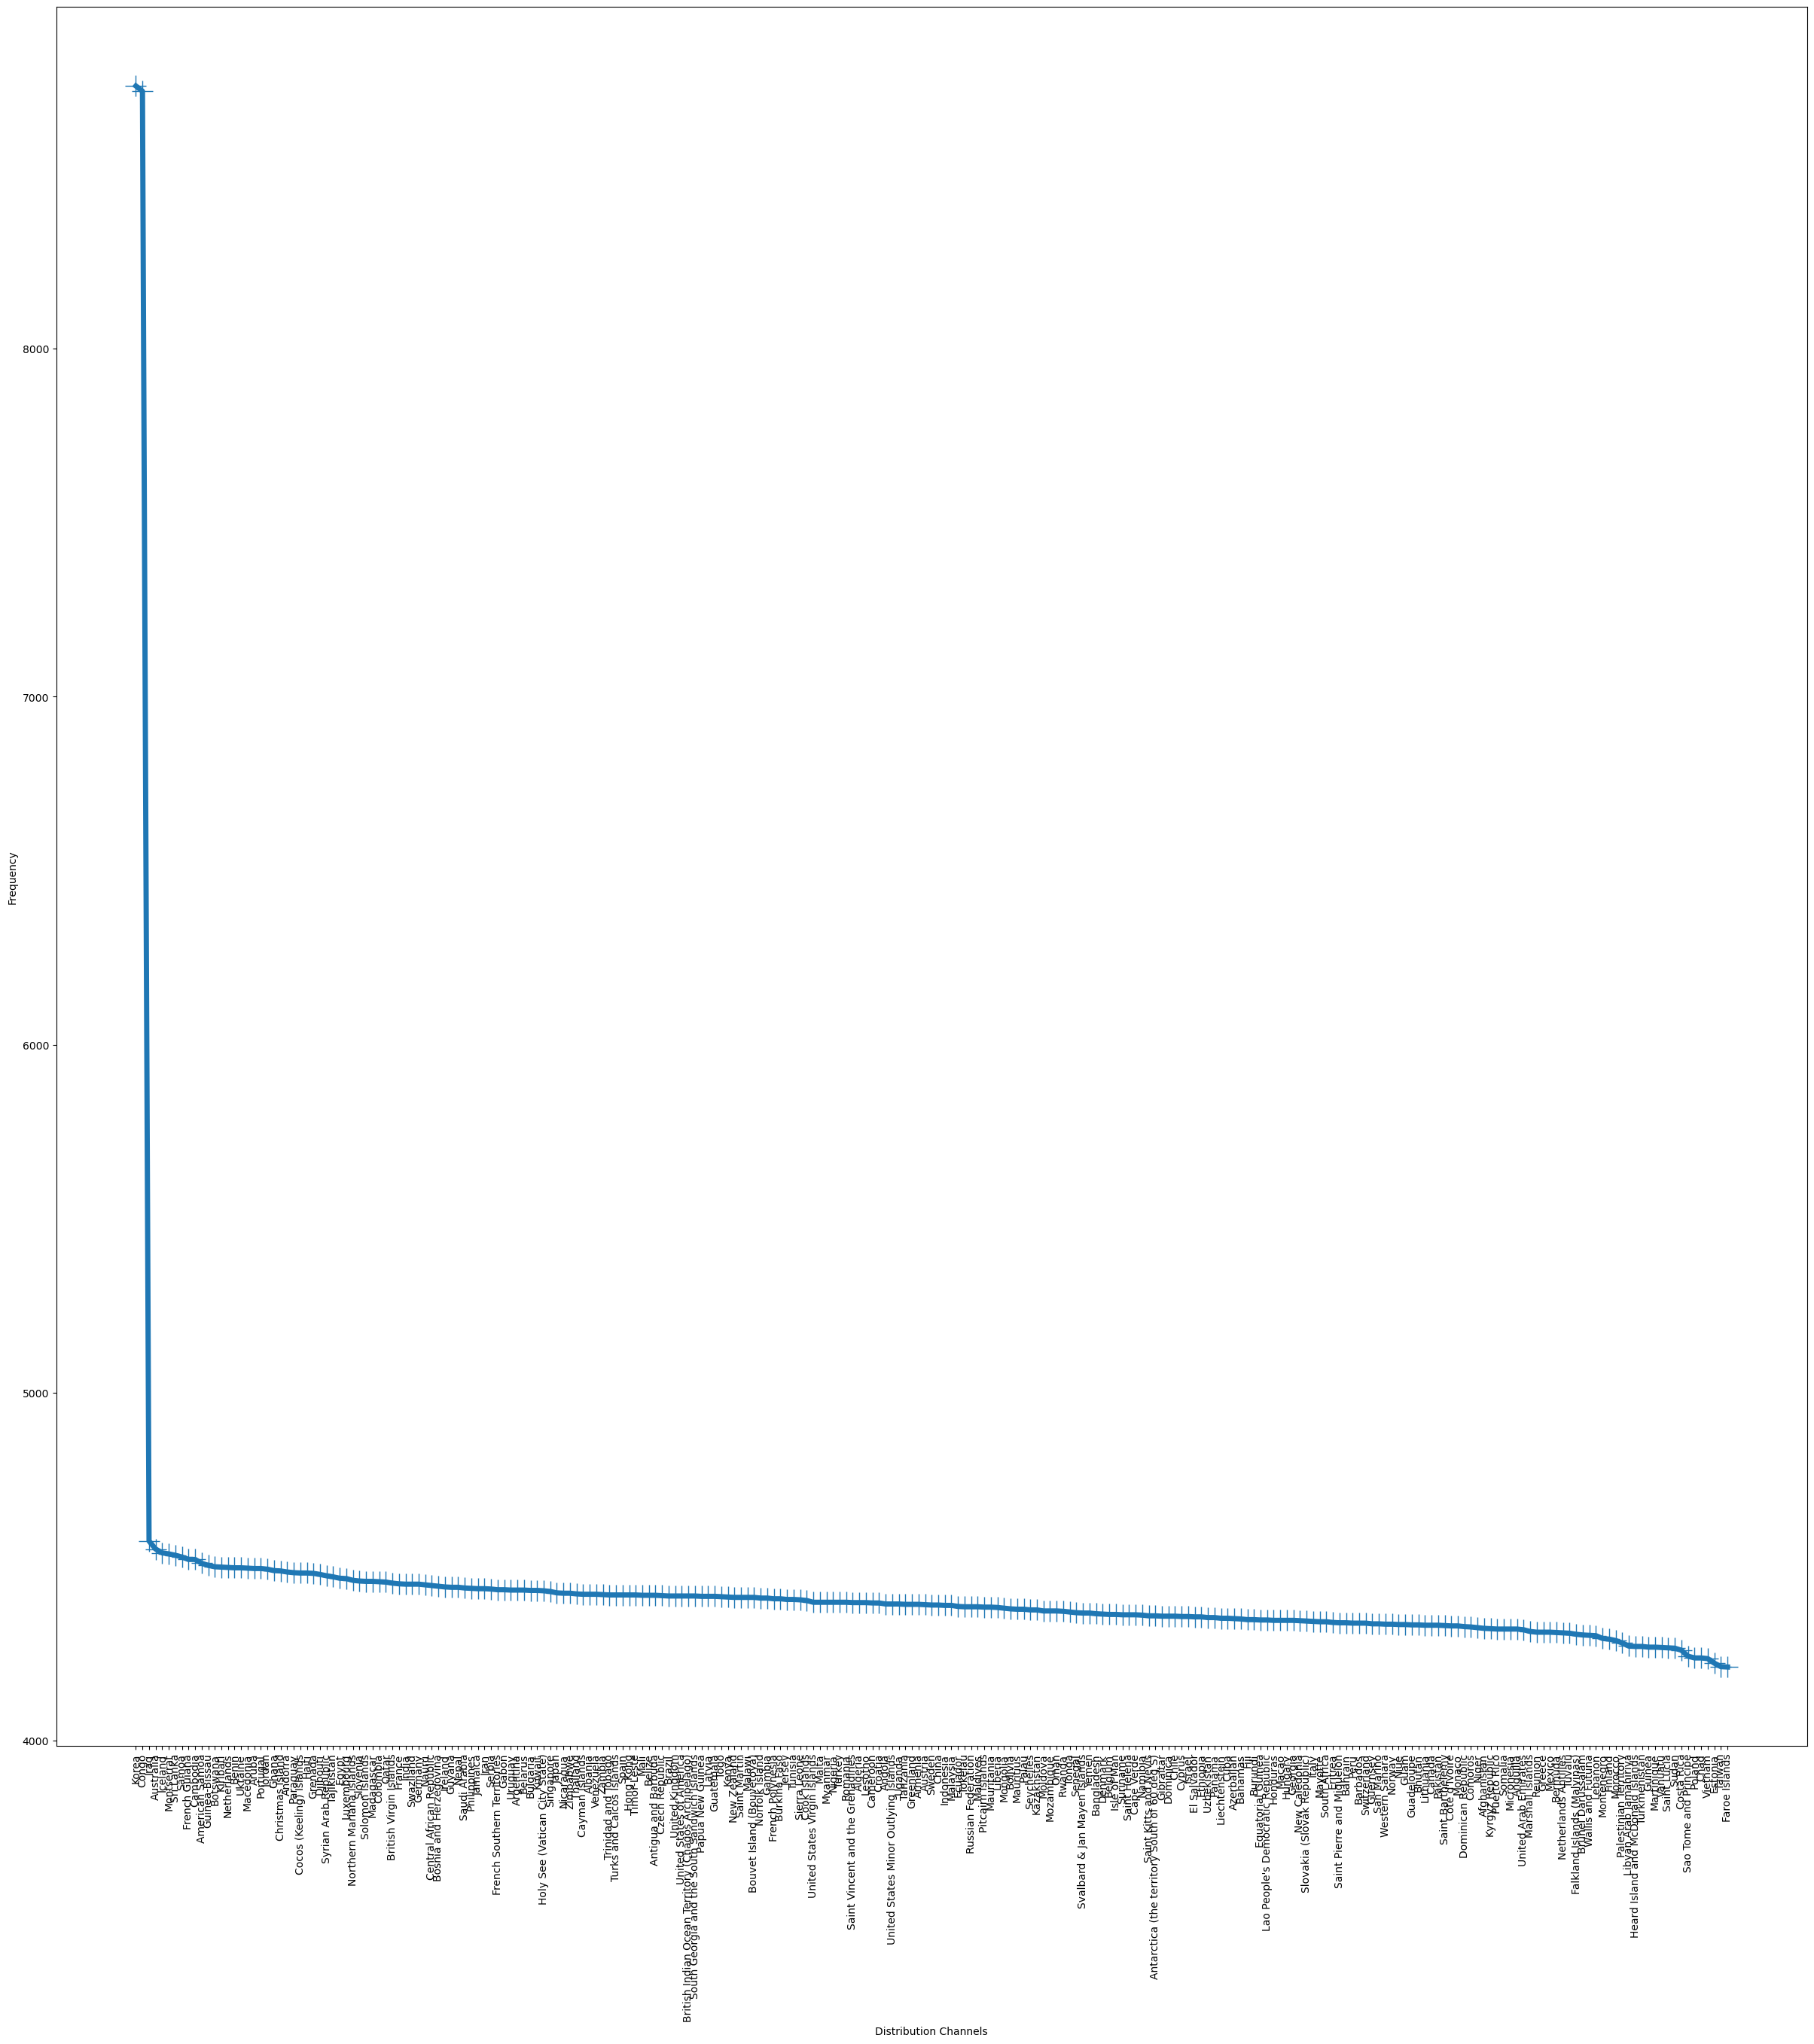

In [16]:
plt.figure(figsize=(30, 30))
plt.xticks(fontsize=10,rotation=90)
distribution_type=dataset['DISTRIBUTION_CHANNEL'].value_counts()
plt.plot(distribution_type,'-+',linewidth=5,markersize=20)
plt.ylabel("Frequency")
plt.xlabel("Distribution Channels")
plt.show()

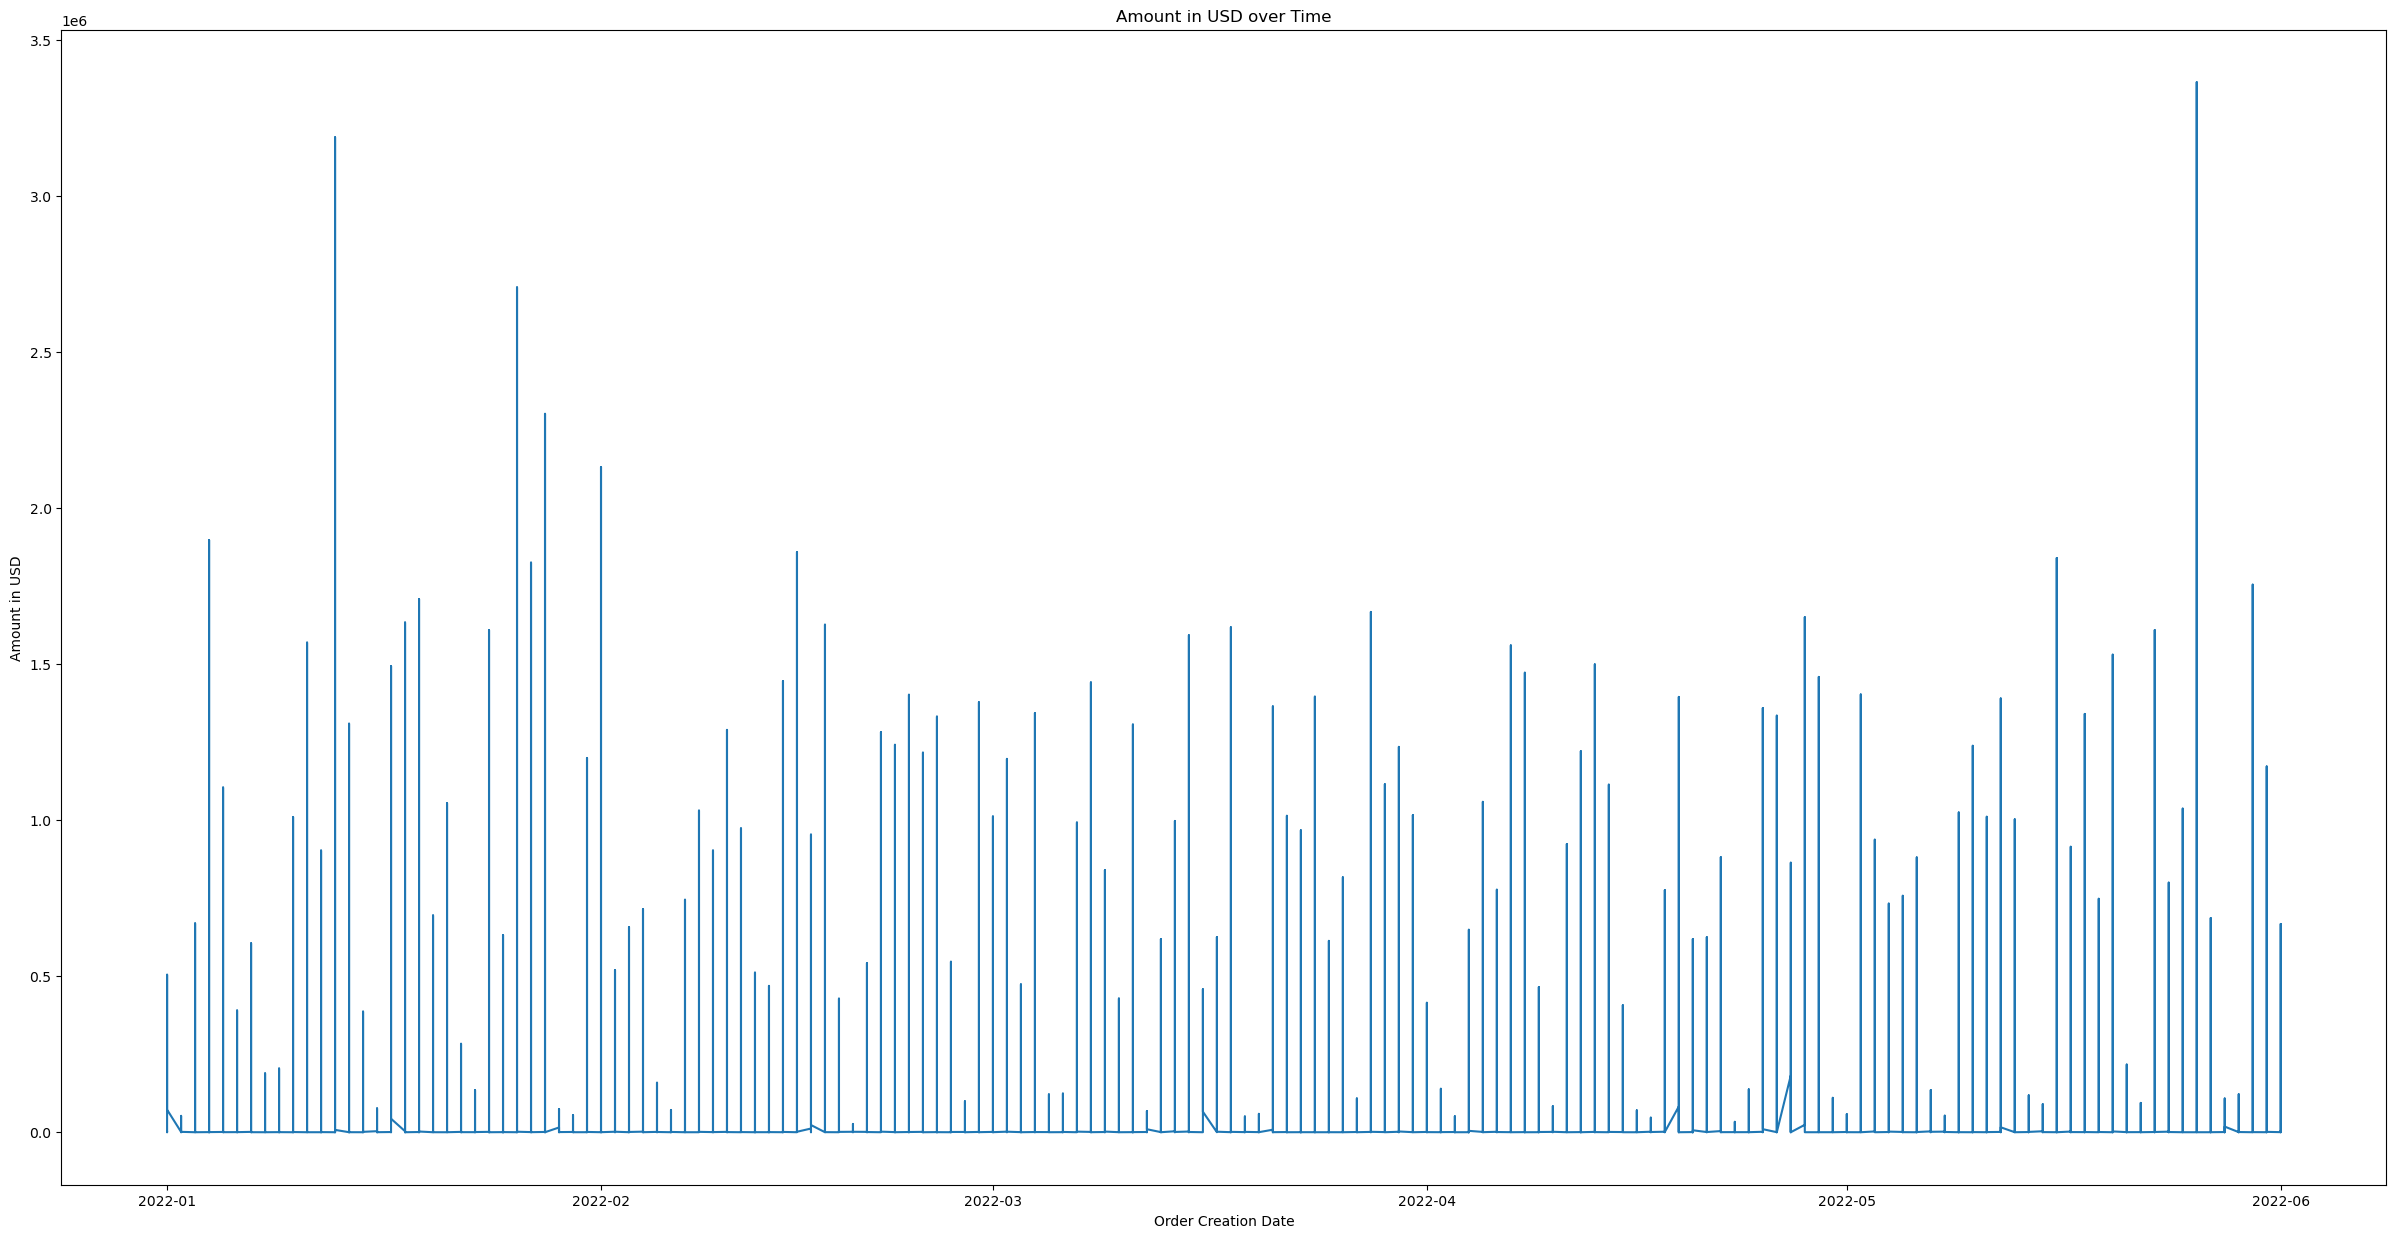

In [17]:
#4 Create a line plot on ORDER_CREATION_DATE and amount_in_usd
plt.figure(figsize=(30, 15))
plt.plot(dataset['ORDER_CREATION_DATE'], dataset['AMOUNT_IN_USD'])

# Adding labels and title
plt.xlabel('Order Creation Date')
plt.ylabel('Amount in USD')
plt.title('Amount in USD over Time')

# Displaying the line plot
plt.show()

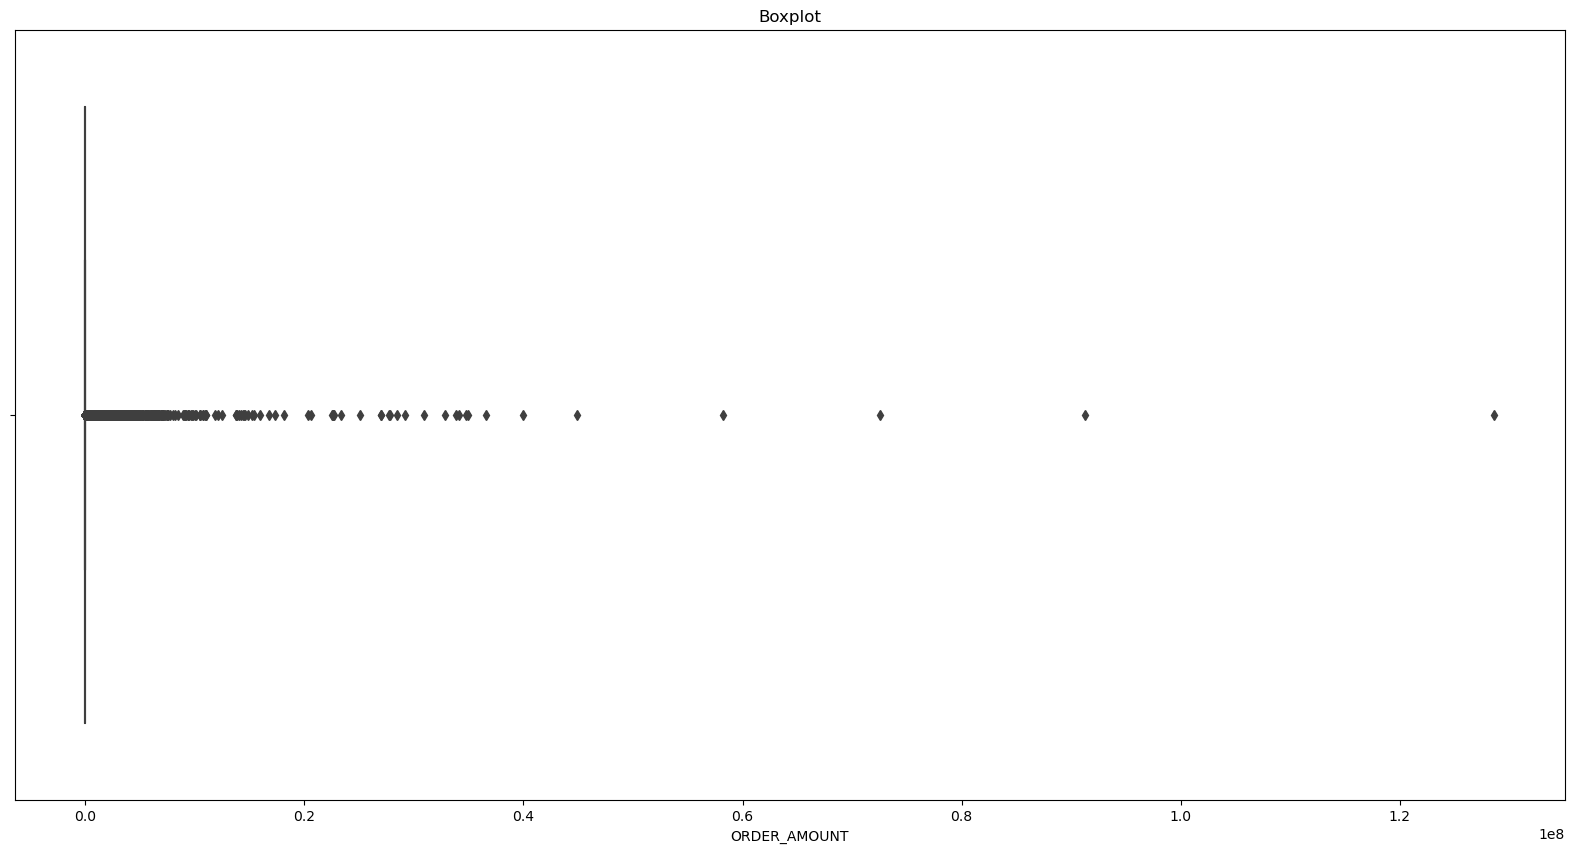

In [18]:
# 5. Boxplot on ORDER_AMOUNT
plt.figure(figsize=(20,10))
sns.boxplot(x=dataset['ORDER_AMOUNT'])
plt.title('Boxplot')
plt.show()

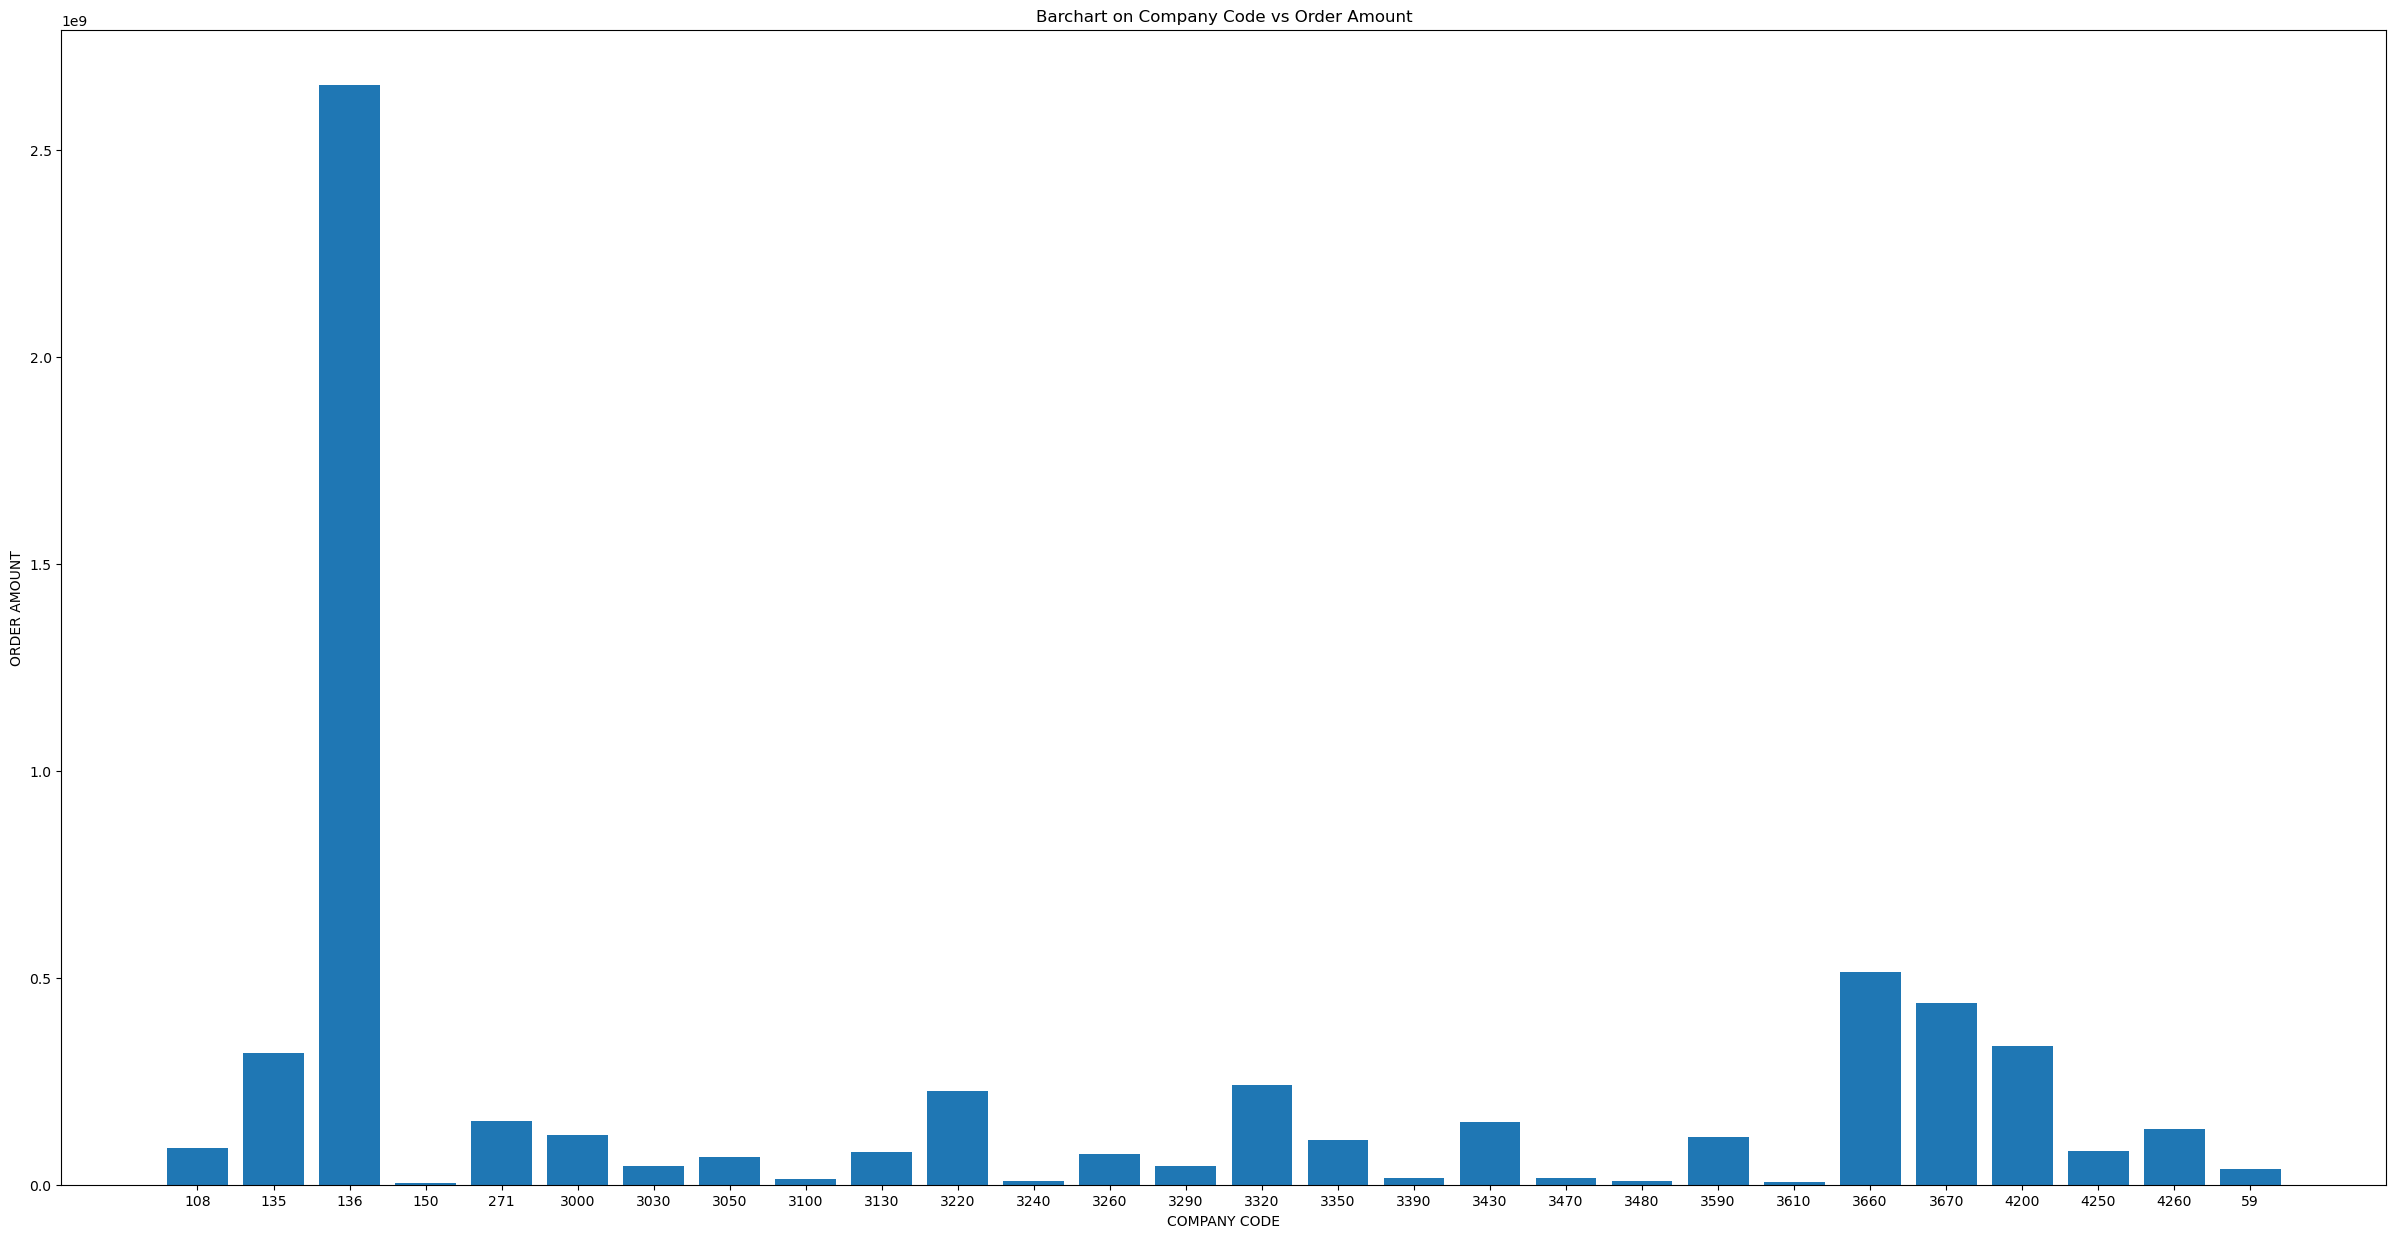

In [19]:
# 6. barchart on COMPANY_CODE and ORDER_AMOUNT
grouped_data = dataset.groupby('COMPANY_CODE')['ORDER_AMOUNT'].sum()
plt.figure(figsize=(30,15))
plt.bar(grouped_data.index,grouped_data)
plt.xlabel('COMPANY CODE')
plt.ylabel('ORDER AMOUNT')
plt.title('Barchart on Company Code vs Order Amount')
plt.show()

### MILESTONE-3 

#### Feature extraction

In [20]:
# 1. Checking the outliers and filling it with appropriate value

#Using the Quartile method
#Firstly calculating the quartiles
quartile1=dataset['AMOUNT_IN_USD'].quantile(0.25)
quartile3 = dataset['AMOUNT_IN_USD'].quantile(0.75)

#Calculating inter-quartile range
IQR=quartile3-quartile1
#Calculating the lower bound & upper bound

lowerBound= quartile1-1.5*IQR
upperBound= quartile3+1.5*IQR
total_outliers=0
for i in dataset.index:
    if (dataset['AMOUNT_IN_USD'][i] < lowerBound) | (dataset['AMOUNT_IN_USD'][i] > upperBound):
      total_outliers=total_outliers+1
print(total_outliers)
dataset.loc[dataset['AMOUNT_IN_USD'] < lowerBound,'AMOUNT_IN_USD'] = lowerBound
dataset.loc[dataset['AMOUNT_IN_USD'] > upperBound,'AMOUNT_IN_USD'] = upperBound

101218


In [21]:
#2. Label encoding or One hot Encoding on all the categorical columns 
#Using label encoding as it helps me manage column size of the dataframe and reduces my complexity while I was using 
from sklearn.preprocessing import LabelEncoder

#So Here , I have used Label encoding 
label_encoder = LabelEncoder()
category = []
continuous = []

for i in dataset.columns:
    if dataset[i].dtype == object:
        category.append(i)
    else:
        continuous.append(i)
for col in category:
    dataset[col] = dataset[col].astype(str)  
    dataset[col] = label_encoder.fit_transform(dataset[col])

In [22]:
print(category)

['DISTRIBUTION_CHANNEL', 'DIVISION', 'RELEASED_CREDIT_VALUE', 'PURCHASE_ORDER_TYPE', 'COMPANY_CODE', 'CREDIT_CONTROL_AREA', 'ORDER_CURRENCY', 'CUSTOMER_NUMBER', 'UNIQUE_CUST_ID', 'ORDER_CURRENCY_MODIFIED']


In [23]:
#3. Log transformation for categorical value
for i in continuous:
  if np.issubdtype(dataset[i].dtype, np.number):
     dataset[i] = dataset[i].apply(lambda x: np.log1p(x) if x > 0 else np.nan)

In [24]:
#4. Extracting new feature Total_order_amount
dataset['TOTAL_ORDER_AMOUNT'] = dataset.groupby('ORDER_CURRENCY')['ORDER_AMOUNT'].transform('sum')

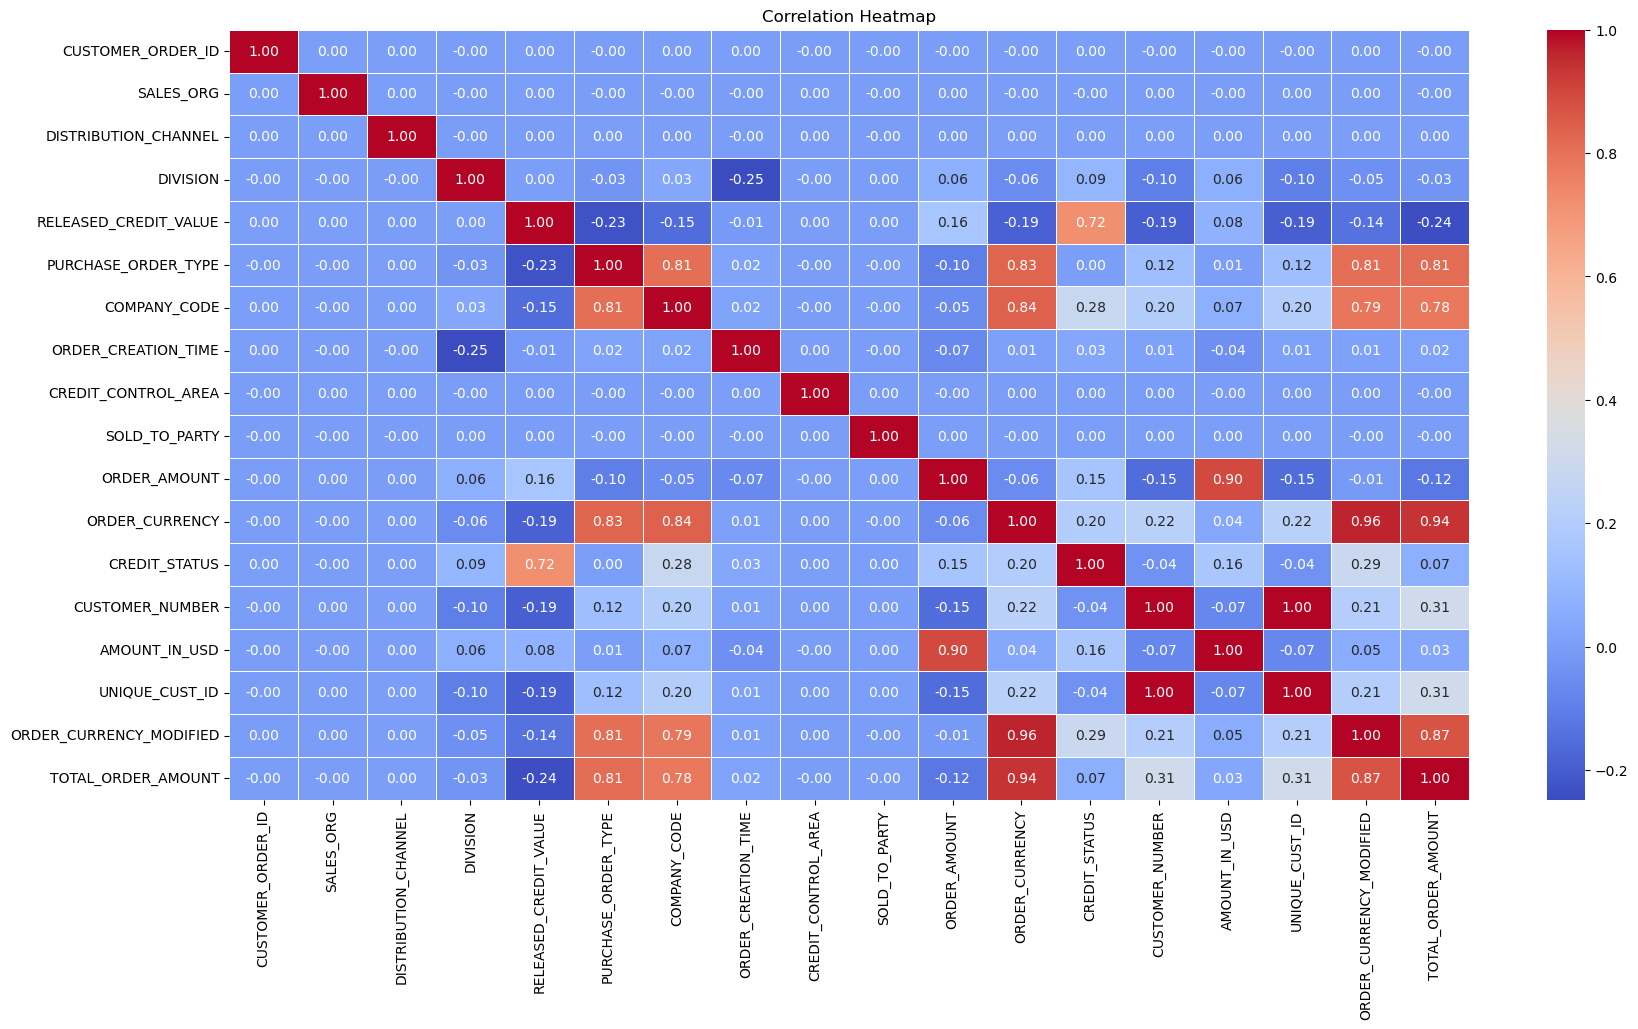

In [25]:
#5. Heatmap of features
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [26]:
#6. Identify important or relevant columns for feature extraction
correlation_with_target = dataset.select_dtypes(include='number').corr()['AMOUNT_IN_USD'].abs().sort_values(ascending=False)

correlation_with_target

AMOUNT_IN_USD              1.000000
ORDER_AMOUNT               0.896967
CREDIT_STATUS              0.161854
RELEASED_CREDIT_VALUE      0.075536
CUSTOMER_NUMBER            0.073157
UNIQUE_CUST_ID             0.073078
COMPANY_CODE               0.066493
DIVISION                   0.062763
ORDER_CURRENCY_MODIFIED    0.051618
ORDER_CREATION_TIME        0.044962
ORDER_CURRENCY             0.038118
TOTAL_ORDER_AMOUNT         0.032572
PURCHASE_ORDER_TYPE        0.005148
CREDIT_CONTROL_AREA        0.001268
DISTRIBUTION_CHANNEL       0.001020
SOLD_TO_PARTY              0.000950
SALES_ORG                  0.000459
CUSTOMER_ORDER_ID          0.000250
Name: AMOUNT_IN_USD, dtype: float64

In [27]:
from superfunc import difference_in_days

new_dataset=difference_in_days(dataset,7,1,'UNIQUE_CUST_ID','ORDER_CREATION_DATE','AMOUNT_IN_USD')

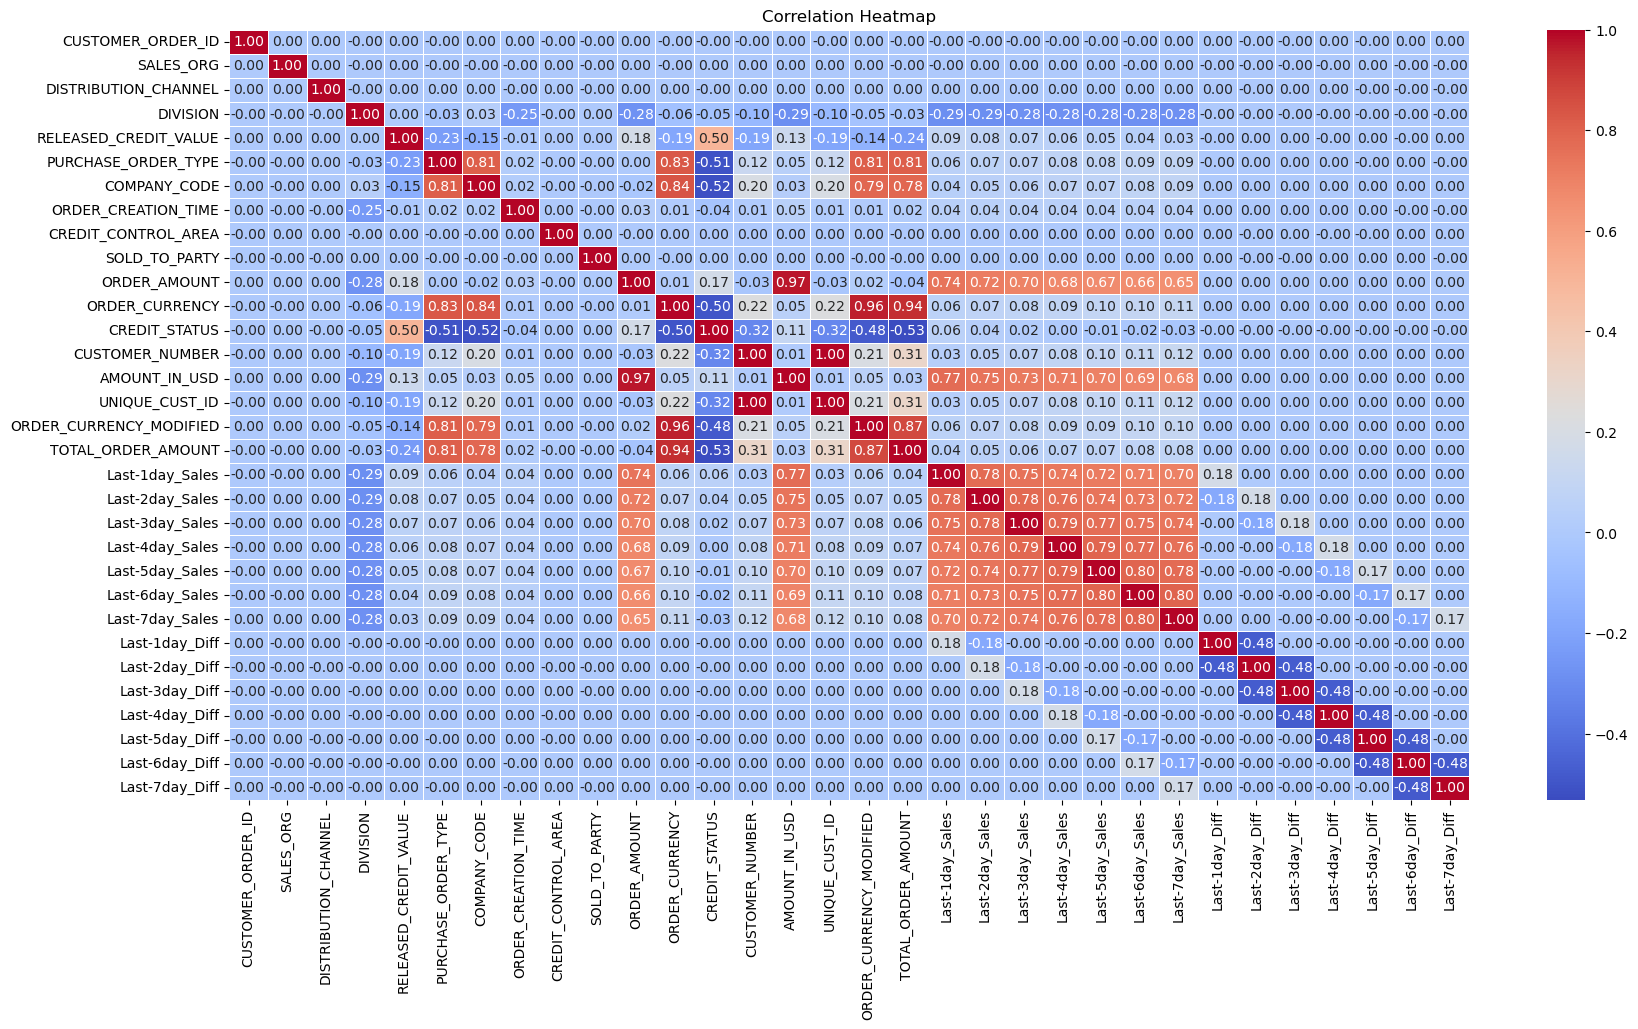

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(new_dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [29]:
new_dataset.to_csv('New_Dataset.csv', index=False)

In [30]:
new_dataset.head()

,CUSTOMER_ORDER_ID,SALES_ORG,DISTRIBUTION_CHANNEL,DIVISION,RELEASED_CREDIT_VALUE,PURCHASE_ORDER_TYPE,COMPANY_CODE,ORDER_CREATION_DATE,ORDER_CREATION_TIME,CREDIT_CONTROL_AREA,...,Last-5day_Sales,Last-6day_Sales,Last-7day_Sales,Last-1day_Diff,Last-2day_Diff,Last-3day_Diff,Last-4day_Diff,Last-5day_Diff,Last-6day_Diff,Last-7day_Diff
0,20.668653,8.171317,232,1,1,0,10,2022-01-01,10.669258,5,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,20.652520,8.078068,116,0,1,342,22,2022-01-01,11.985077,0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,20.457065,7.951911,40,0,1,342,22,2022-01-01,11.984465,7,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,20.612075,7.926603,75,0,1,342,22,2022-01-01,11.984216,4,...,0.0,0.0,0.0,1.971979,0.000000,0.0,0.0,0.0,0.0,0.0
4,20.489818,8.107720,102,0,1,342,22,2022-01-01,11.983042,2,...,0.0,0.0,0.0,-0.767117,1.971979,0.0,0.0,0.0,0.0,0.0


### MILESTONE-4


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [32]:
df = pd.read_csv("New_Dataset.csv")

In [33]:
#df1 dataframe having features I will be using in model training
#I selected these features on the basis of correlation scores/domain knowledge
df1 = df.filter(['AMOUNT_IN_USD','ORDER_CURRENCY','RELEASED_CREDIT_VALUE','UNIQUE_CUS_ID', 'Last-7day_Sales','Last-6day_Sales','Last-5day_Sales','Last-4day_Sales','Last-3day_Sales','Last-2day_Sales', 'Last-1day_Sales'],axis=1)

In [34]:
df1=df1.dropna()
X=df1.drop('AMOUNT_IN_USD',axis=1)
y = df1['AMOUNT_IN_USD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

### Training Models

1. LINEAR REGRESSION

In [35]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [36]:
linear_regression_mse = mean_squared_error(np.exp(y_test), np.exp(y_pred))
r2_linear = r2_score(y_test, y_pred)
print("FOR TEST DATA:")
print("Mean Squared Error:", linear_regression_mse)
print("R-squared Score:", r2_linear)

FOR TEST DATA:
Mean Squared Error: 274247.3914516662
R-squared Score: 0.6819904458984176


In [37]:
y_pred_train = model.predict(X_train)

In [38]:
mse_tL = mean_squared_error(np.exp(y_train), np.exp(y_pred_train))
r2_tL = r2_score(y_train, y_pred_train)
print("FOR TRAIN DATA:")
print("Mean Squared Error:", mse_tL)
print("R-squared Score:", r2_tL)

FOR TRAIN DATA:
Mean Squared Error: 274409.21520844783
R-squared Score: 0.6811457442752181


2. DECISION TREE

In [39]:
model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [40]:
decision_tree_mse = mean_squared_error(np.exp(y_test), np.exp(y_pred))
r2_DecisionT = r2_score(y_test, y_pred)
print("FOR TEST DATA:")
print("Mean Squared Error:", decision_tree_mse)
print("R-squared Score:", r2_DecisionT)

FOR TEST DATA:
Mean Squared Error: 369283.91440173105
R-squared Score: 0.49299431845809727


In [41]:
y_pred_train = model.predict(X_train)

In [42]:
mse_tD = mean_squared_error(np.exp(y_train), np.exp(y_pred_train))
r2_tD = r2_score(y_train, y_pred_train)
print("FOR TRAIN DATA:")
print("Mean Squared Error:", mse_tD)
print("R-squared Score:", r2_tD)

FOR TRAIN DATA:
Mean Squared Error: 26886.885590486774
R-squared Score: 0.9452390892677915


3. RANDOM FOREST

In [43]:
model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [44]:
random_forest_mse = mean_squared_error(np.exp(y_test), np.exp(y_pred))
r2_RandomF = r2_score(y_test, y_pred)
print("FOR TEST DATA:")
print("Mean Squared Error:", random_forest_mse)
print("R-squared Score:", r2_RandomF)

FOR TEST DATA:
Mean Squared Error: 249413.73945641334
R-squared Score: 0.7104131372565355


In [45]:
y_pred_train = model.predict(X_train)

In [46]:
mse_tRF = mean_squared_error(np.exp(y_train), np.exp(y_pred_train))
r2_tRF = r2_score(y_train, y_pred_train)
print("FOR TRAIN DATA:")
print("Mean Squared Error:", mse_tRF)
print("R-squared Score:", r2_tRF) 

FOR TRAIN DATA:
Mean Squared Error: 95152.30790803273
R-squared Score: 0.9130952453252116


4. AdaBoost

In [47]:
model = AdaBoostRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [48]:
adaboost_mse = mean_squared_error(np.exp(y_test), np.exp(y_pred))
r2_adaboost = r2_score(y_test, y_pred)
print("FOR TEST DATA:")
print("Mean Squared Error:", adaboost_mse)
print("R-squared Score:", r2_adaboost)

FOR TEST DATA:
Mean Squared Error: 370382.05320941017
R-squared Score: 0.6455484703230723


In [49]:
y_pred_train = model.predict(X_train)

In [50]:
mse_tAB = mean_squared_error(np.exp(y_train), np.exp(y_pred_train))
r2_tAB = r2_score(y_train, y_pred_train)
print("FOR TRAIN DATA:")
print("Mean Squared Error:", mse_tAB)
print("R-squared Score:", r2_tAB)

FOR TRAIN DATA:
Mean Squared Error: 369702.50477374357
R-squared Score: 0.6443075923694274


5. XgBoost

In [51]:
model = xgb.XGBRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [52]:
xgboost_mse = mean_squared_error(np.exp(y_test), np.exp(y_pred))
r2_xgboost = r2_score(y_test, y_pred)
print("FOR TEST DATA:")
print("Mean Squared Error:", xgboost_mse)
print("R-squared Score:", r2_xgboost)

FOR TEST DATA:
Mean Squared Error: 245259.98369513947
R-squared Score: 0.72550526335401


In [53]:
y_pred_train = model.predict(X_train)

In [54]:
mse_tXG = mean_squared_error(np.exp(y_train), np.exp(y_pred_train))
r2_tXG = r2_score(y_train, y_pred_train)
print("FOR TRAIN DATA:")
print("Mean Squared Error:", mse_tXG)
print("R-squared Score:", r2_tXG)

FOR TRAIN DATA:
Mean Squared Error: 239970.03526678932
R-squared Score: 0.7364061935808077


### Model comparsion

In [55]:
comparison_table = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost'],
    'MSE': [linear_regression_mse, decision_tree_mse, random_forest_mse, adaboost_mse, xgboost_mse],
    'R_2_test': [r2_linear,r2_DecisionT,r2_RandomF,r2_adaboost,r2_xgboost],
    'R_2_train': [r2_tL,r2_tD,r2_tRF,r2_tAB,r2_tXG]
})
comparison_table

,Model,MSE,R_2_test,R_2_train
0,Linear Regression,274247.391452,0.681990,0.681146
1,Decision Tree,369283.914402,0.492994,0.945239
2,Random Forest,249413.739456,0.710413,0.913095
3,AdaBoost,370382.053209,0.645548,0.644308
4,XGBoost,245259.983695,0.725505,0.736406


In [57]:
# Selecting the best model on the basis of R^2 value
print("The best model among them is:",comparison_table['Model'][comparison_table['R_2_test']==comparison_table['R_2_test'].max()])

The best model among them is: 4    XGBoost
Name: Model, dtype: object


### Hyperparameter tuning

In [59]:
# I am using Randomized search for hyper-parameter tuning because:
# i)If the search space is large, randomized search is more efficient.
# ii) We have limited resoruces 

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.01, 0.05,  0.1 ],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 200, 300]
}


# Create the model
model =xgb.XGBRegressor(random_state=42)

random_search = RandomizedSearchCV(model, param_distributions=param_grid, scoring='neg_mean_squared_error', cv=5)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

y_pred = best_model.predict(X_test)
#Mean square error
mse = mean_squared_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Evaluation Metrics:")
print("MSE:", mse)
print("R-Squared:", r2)


Evaluation Metrics:
MSE: 1.982667989954657
R-Squared: 0.7269340549644376


### FINAL TUNED MODEL

In [61]:
best_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Evaluation Metrics:")
print("MSE:", mse)
print("RMSE:", rmse)
print("R-Squared:", r2)

Evaluation Metrics:
MSE: 1.982667989954657
RMSE: 1.4080724377512177
R-Squared: 0.7269340549644376


In [62]:
results={
    "Predicted Amount":np.exp(y_pred),
    "Actual Amount":np.exp(y_test)
}
results=pd.DataFrame(results)
results.head(30)

,Predicted Amount,Actual Amount
710716,65.203278,75.1906
365146,42.685631,1.0000
909296,305.150818,268.6200
92958,134.379211,151.4200
1007861,949.741394,375.9702
48496,374.614349,1807.1770
552775,751.606873,1807.1770
893152,3.567728,1.0000
785920,407.910919,868.9500
1032304,838.447632,1807.1770
